Загружаем библиотеки, если происходит ошибка то нужно выполнить команду:

    pip install numpy matplotlib

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Загружаем данные мультимагнитнго канала и показываем его.

Данные взяты из проезда `[494]_2018_01_03_01.mmag` по второму рельсу, и сохранены в файл `mm_data.npz`,
так сделано чтобы не зависеть от кода чтения мультимагнитных файлов (потом можно изменить).

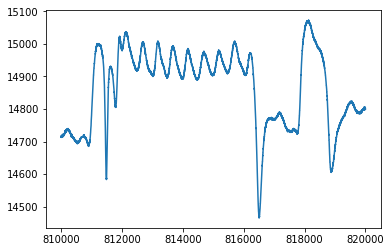

In [2]:
with np.load('mm_data.npz') as zf:
    raw_data = zf['mm'].astype('float64')
    coords =  zf['coords']
    
# print(mm_data)
plt.plot(coords, raw_data[0])

Функция для создания ядра дифференцирования (прямоугольный вариант)

и пример ядра размером 6

<BarContainer object of 6 artists>

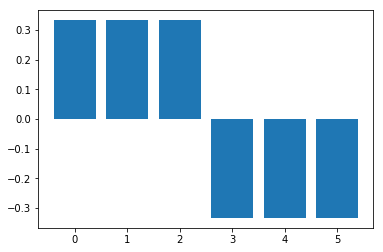

In [3]:
def make_kernel(l):
    l = max(1, l)
    o = np.full((l,), 1.0/l, dtype='f8')
    res = np.concatenate([o, -o])
    assert(np.sum(res) < 1.0e-8)
    return res
    
tmp_kernel = make_kernel(3)
plt.bar(np.arange(len(tmp_kernel)), tmp_kernel)

Создаем ядро размером 10 и обрабатываем им данные (дифференцируем)

In [4]:
kernel = make_kernel(10)
processed_data = np.array([np.convolve(raw_ch, kernel, mode='valid') for raw_ch in raw_data])

print(kernel)
# print(processed_data)
# print(processed_data.shape)

[ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1 -0.1 -0.1 -0.1 -0.1
 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1]


вычисляем среднее значение по каналам и дисперсию 

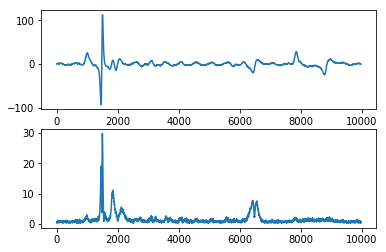

In [5]:
data_mean = np.sum(processed_data, axis=0) / processed_data.shape[0]
data_disp = np.std(processed_data, axis=0) 
# print(data_disp)

plt.subplot(2,1,1)
plt.plot(data_mean)
plt.subplot(2,1,2)
plt.plot(data_disp)

Вычисляем новый параметр для нормализации, как квадрат среднего значения, ограничиваем снизу 1, чтобы исключить деление на 0

вычисляем значение дисперсия/квадрат_среднего

In [6]:
data_mean_prep = np.power(data_mean, 2)
# data_mean_prep = np.abs(data_mean)
data_mean_prep = np.maximum(data_mean_prep, 1)

data_disp_prep = data_disp / data_mean_prep

# plt.subplot(2,2,1)
# plt.plot(data_mean)
# plt.subplot(2,2,2)
# plt.plot(data_disp)

графики: квадрат среднего, подготовленная дисперсия

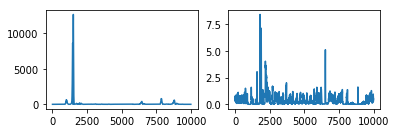

In [7]:
plt.subplot(2,2,3)
plt.plot(data_mean_prep)
plt.subplot(2,2,4) # .set_ylim(0,0.1)
plt.plot(data_disp_prep)

Теперь почитаем данные не из выреданного куска mm_data.npz, а из реальных данных.

Для этого загружаем библиотеку чтения ММ данных.

In [8]:
from multimagnetic_data import Reader

открываем файл 

In [9]:
mm_file = Reader(r'D:\ATapeXP\Main\494\multimagnetic\2018_01_25\Avikon-03M\12216\[494]_2018_01_03_01.mmag')

и читаем данные

channels =  [(2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7)]


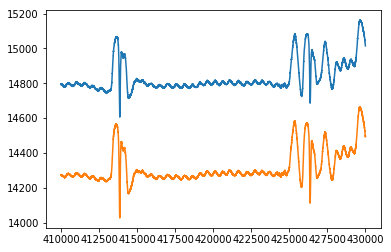

In [10]:
rail = 2
channels = [(rail, i) for i in range(0,8)]
print('channels = ', channels)

req_coord_range = [410000, 430000] # mm
mm_coords, mm_data_array_2d = mm_file.get_data(channels, req_coord_range)
mm_data_array_2d = np.array(mm_data_array_2d)

plt.plot(mm_coords, mm_data_array_2d[0])
plt.plot(mm_coords, mm_data_array_2d[1])